In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
sub_df = pd.read_csv('submission_format.csv')
test_vals = pd.read_csv('test_set_values.csv')
train_labels = pd.read_csv('training_set_labels.csv')
train_vals = pd.read_csv('training_set_values.csv')

In [3]:
sub_df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [4]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int64 
 1   status_group  14850 non-null  object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


In [5]:
test_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
test_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
train_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
train_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [11]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Merge Training Dataset

In [12]:
train_df = train_vals.merge(train_labels, left_on = 'id', right_on = 'id')

In [13]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


## Check for Duplicate IDs

In [14]:
train_df['id'].is_unique

True

## Check data

In [15]:
train_df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [16]:
train_df['ward'].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Mitole         1
Rasbura        1
Kitete         1
Sungwisi       1
Nyamtinga      1
Name: ward, Length: 2092, dtype: int64

In [17]:
train_df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [18]:
train_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [19]:
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

### Check the duplicate columns

In [21]:
train_df[['region', 'region_code']].value_counts()

region         region_code
Iringa         11             5294
Shinyanga      17             4956
Mbeya          12             4639
Kilimanjaro    3              4379
Morogoro       5              4006
Kagera         18             3316
Mwanza         19             3047
Arusha         2              3024
Kigoma         16             2816
Ruvuma         10             2640
Tanga          4              2513
Dodoma         1              2201
Singida        13             2093
Mara           20             1969
Tabora         14             1959
Rukwa          15             1808
Pwani          6              1609
Manyara        21             1583
Lindi          80             1238
Pwani          60             1025
Mtwara         90              917
Dar es Salaam  7               805
Mtwara         99              423
               9               390
Arusha         24              326
Lindi          8               300
Mwanza         17               55
Tanga          5            

In [22]:
#Who operates the waterpoint
train_df[['scheme_management', 'scheme_name']].value_counts()

scheme_management  scheme_name               
VWC                K                             571
WUA                Chalinze wate                 404
VWC                DANIDA                        378
                   M                             331
WUG                None                          325
                                                ... 
VWC                NKENJA                          1
                   NYA/ MAK/ BUK piped scheme      1
                   NYA/MAK/BUK  piped scheme       1
                   NYA/MAK/BUK piped scheme        1
Company            BFFS                            1
Length: 3077, dtype: int64

In [23]:
#The kind of extraction the waterpoint uses
train_df[['extraction_type', 'extraction_type_group', 'extraction_type_class']].value_counts()

extraction_type            extraction_type_group  extraction_type_class
gravity                    gravity                gravity                  26780
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
submersible                submersible            submersible               4764
swn 80                     swn 80                 handpump                  3670
mono                       mono                   motorpump                 2865
india mark ii              india mark ii          handpump                  2400
afridev                    afridev                handpump                  1770
ksb                        submersible            submersible               1415
other - rope pump          rope pump              rope pump                  451
other - swn 81             other handpump         handpump                   229
windmill                   wind-power

In [24]:
#How the waterpoint is managed
train_df[['management', 'management_group']].value_counts()

management        management_group
vwc               user-group          40507
wug               user-group           6515
water board       user-group           2933
wua               user-group           2535
private operator  commercial           1971
parastatal        parastatal           1768
water authority   commercial            904
other             other                 844
company           commercial            685
unknown           unknown               561
other - school    other                  99
trust             commercial             78
dtype: int64

In [25]:
train_df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [26]:
train_df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [27]:
#What the water costs
train_df[['payment', 'payment_type']].value_counts()

payment                payment_type
never pay              never pay       25348
pay per bucket         per bucket       8985
pay monthly            monthly          8300
unknown                unknown          8157
pay when scheme fails  on failure       3914
pay annually           annually         3642
other                  other            1054
dtype: int64

In [28]:
#The quality of the water
train_df[['water_quality', 'quality_group']].value_counts()

water_quality       quality_group
soft                good             50818
salty               salty             4856
unknown             unknown           1876
milky               milky              804
coloured            colored            490
salty abandoned     salty              339
fluoride            fluoride           200
fluoride abandoned  fluoride            17
dtype: int64

In [29]:
#The quantity of the water
train_df[['quantity', 'quantity_group']].value_counts()

quantity      quantity_group
enough        enough            33186
insufficient  insufficient      15129
dry           dry                6246
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [30]:
#The source of the water
train_df[['source', 'source_type', 'source_class']].value_counts()

source                source_type           source_class
spring                spring                groundwater     17021
shallow well          shallow well          groundwater     16824
machine dbh           borehole              groundwater     11075
river                 river/lake            surface          9612
rainwater harvesting  rainwater harvesting  surface          2295
hand dtw              borehole              groundwater       874
lake                  river/lake            surface           765
dam                   dam                   surface           656
other                 other                 unknown           212
unknown               other                 unknown            66
dtype: int64

In [31]:
#The kind of waterpoint
train_df[['waterpoint_type', 'waterpoint_type_group']].value_counts()

waterpoint_type              waterpoint_type_group
communal standpipe           communal standpipe       28522
hand pump                    hand pump                17488
other                        other                     6380
communal standpipe multiple  communal standpipe        6103
improved spring              improved spring            784
cattle trough                cattle trough              116
dam                          dam                          7
dtype: int64

In [32]:
#Geographic location
train_df[['subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward']].value_counts()

subvillage            region         region_code  district_code  lga           ward   
Mtaa Wa Kitunda Kati  Dar es Salaam  7            2              Ilala         Kitunda    84
Marurani Kati         Arusha         2            2              Arusha Rural  Nduruma    59
Marurani Juu          Arusha         2            2              Arusha Rural  Nduruma    54
Mtaa Wa Vikongoro     Dar es Salaam  7            2              Ilala         Chanika    47
Vikuge                Pwani          6            2              Kibaha        Soga       41
                                                                                          ..
Minazini              Lindi          80           43             Liwale        Mihumo      1
                      Morogoro       5            4              Ulanga        Itete       1
                                                  6              Mvomero       Hembeti     1
                                                                            

### Dropping Columns/Rows

In [33]:
#Dropping scheme_name column due to the extensive number of missing values
#dropping columns with duplicate data
train_new = train_df.drop(['scheme_name', 'num_private', 'recorded_by', 'extraction_type', 'extraction_type_group', 'management', 'payment', 'water_quality', 'quantity_group', 'source', 'waterpoint_type'], axis=1)

In [34]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [35]:
#drop null values 
train_new = train_new.dropna()
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48288 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     48288 non-null  int64  
 1   amount_tsh             48288 non-null  float64
 2   date_recorded          48288 non-null  object 
 3   funder                 48288 non-null  object 
 4   gps_height             48288 non-null  int64  
 5   installer              48288 non-null  object 
 6   longitude              48288 non-null  float64
 7   latitude               48288 non-null  float64
 8   wpt_name               48288 non-null  object 
 9   basin                  48288 non-null  object 
 10  subvillage             48288 non-null  object 
 11  region                 48288 non-null  object 
 12  region_code            48288 non-null  int64  
 13  district_code          48288 non-null  int64  
 14  lga                    48288 non-null  object 
 15  wa

In [36]:
train_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,48288.000000,48288.000000,48288.000000,48288.000000,4.828800e+04,48288.000000,48288.000000,48288.000000,48288.000000
mean,37138.591203,360.417379,701.494429,34.213824,-5.700627e+00,14.794110,5.754618,176.683048,1342.774747
std,21437.666601,2828.437040,698.811196,6.329288,2.870772e+00,17.235444,9.701979,472.505399,937.146464
min,2.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18578.750000,0.000000,0.000000,33.039487,-8.251540e+00,5.000000,2.000000,0.000000,0.000000
50%,37093.500000,0.000000,463.000000,35.212593,-4.986570e+00,12.000000,3.000000,30.000000,1987.000000
75%,55666.250000,50.000000,1335.000000,37.355583,-3.334879e+00,17.000000,5.000000,200.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


In [37]:
#Check the wells with longitude = 0
train_new.loc[train_new['longitude'] == 0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type_group,status_group
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,Lake Victoria,...,0,submersible,user-group,unknown,unknown,dry,borehole,groundwater,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,Lake Victoria,...,0,gravity,parastatal,other,good,seasonal,rainwater harvesting,surface,communal standpipe,functional
256,33500,0.0,2011-07-18,Hesawa,0,DWE,0.0,-2.000000e-08,Bombani,Lake Victoria,...,0,handpump,user-group,never pay,unknown,dry,borehole,groundwater,hand pump,non functional
301,70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,Lake Victoria,...,0,handpump,user-group,never pay,good,insufficient,borehole,groundwater,hand pump,functional
306,59713,0.0,2011-07-30,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Petro,Lake Victoria,...,0,handpump,user-group,never pay,good,insufficient,borehole,groundwater,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59135,26831,0.0,2011-08-25,Hesawa,0,Hesawa,0.0,-2.000000e-08,Bombani,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional
59158,28019,0.0,2011-07-19,Wsdp,0,DWE,0.0,-2.000000e-08,Maweni,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,Lake Victoria,...,0,handpump,user-group,other,good,enough,shallow well,groundwater,hand pump,functional needs repair
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,Lake Victoria,...,0,handpump,user-group,never pay,good,enough,shallow well,groundwater,hand pump,functional needs repair


In [38]:
#Drop the rows where Longitude is 0
train_new = train_new.loc[train_new['longitude'] != 0]

In [39]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   date_recorded          46962 non-null  object 
 3   funder                 46962 non-null  object 
 4   gps_height             46962 non-null  int64  
 5   installer              46962 non-null  object 
 6   longitude              46962 non-null  float64
 7   latitude               46962 non-null  float64
 8   wpt_name               46962 non-null  object 
 9   basin                  46962 non-null  object 
 10  subvillage             46962 non-null  object 
 11  region                 46962 non-null  object 
 12  region_code            46962 non-null  int64  
 13  district_code          46962 non-null  int64  
 14  lga                    46962 non-null  object 
 15  wa

In [40]:
train_new.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000,46962.000000
mean,37115.876198,370.593978,721.301542,35.179871,-5.861588,14.705123,5.834547,181.671798,1380.688791
std,21443.914412,2867.433657,698.454483,2.684188,2.744181,17.468023,9.818294,478.183092,922.330278
min,2.000000,0.000000,-90.000000,29.607122,-11.649440,1.000000,0.000000,0.000000,0.000000
25%,18560.250000,0.000000,0.000000,33.196012,-8.410366,5.000000,2.000000,0.000000,0.000000
50%,37060.500000,0.000000,530.500000,35.353205,-5.108867,11.000000,3.000000,40.000000,1989.000000
75%,55665.750000,50.000000,1348.000000,37.404240,-3.375047,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-0.998464,99.000000,80.000000,30500.000000,2013.000000


### Construction Year

In [41]:
#Check the construction years
train_new['construction_year'].value_counts()

0       14489
2008     2426
2009     2306
2010     2011
2007     1423
2006     1329
2000     1252
2003     1191
2011     1032
1978      997
2004      987
2002      954
2005      879
1999      877
2012      836
1998      789
1995      782
1985      767
1984      710
1982      695
1972      679
1974      621
1990      615
1994      595
1980      581
1996      571
1992      512
1988      491
2001      476
1997      476
1993      463
1983      457
1975      402
1986      391
1976      367
1970      297
1989      293
1991      278
1987      268
1981      217
1973      183
1979      161
1977      153
2013      134
1971      128
1963       83
1967       80
1968       57
1969       55
1960       39
1962       27
1964       27
1961       20
1965       17
1966       16
Name: construction_year, dtype: int64

In [42]:
#Find the mean of the construction year of the dataset excluding construction year 0 
train_new.loc[train_df['construction_year']!=0].describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000,32473.000000
mean,37051.645983,515.806547,1017.578049,35.985533,-6.308962,14.984387,6.162935,257.543990,1996.732886
std,21412.047084,3237.707602,618.436186,2.654443,2.668991,20.351304,10.879739,548.408907,12.604326
min,3.000000,0.000000,-63.000000,29.607122,-11.649440,2.000000,1.000000,0.000000,1960.000000
25%,18452.000000,0.000000,404.000000,34.683623,-8.789443,4.000000,2.000000,25.000000,1986.000000
50%,37025.000000,0.000000,1146.000000,36.776345,-6.126406,10.000000,3.000000,130.000000,2000.000000
75%,55482.000000,250.000000,1495.000000,37.884817,-3.783045,16.000000,5.000000,300.000000,2008.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-1.104943,99.000000,63.000000,30500.000000,2013.000000


In [126]:
#Replace 0 values in construction_year with the mean of 1997
train_new['construction_year'].replace(0,1997, inplace=True)

### Installer

In [44]:
train_new['installer'].value_counts()

DWE                   13879
Government             1283
RWE                    1007
Commu                   893
KKKT                    884
                      ...  
JUINE CO                  1
CALTAZ KAHAMA             1
Contr                     1
SHIPO CONSTRUCTORS        1
REDAP                     1
Name: installer, Length: 1757, dtype: int64

In [45]:
train_new['installer'].value_counts().head(20)

DWE                   13879
Government             1283
RWE                    1007
Commu                   893
KKKT                    884
DANIDA                  861
TCRS                    668
Central government      616
CES                     610
DANID                   552
District Council        538
Community               528
Hesawa                  523
LGA                     400
District council        386
WEDECO                  379
HESAWA                  366
Gover                   352
World vision            345
0                       344
Name: installer, dtype: int64

In [46]:
train_new['installer'].nunique()

1757

In [49]:
train_new['installer'].value_counts().head(50)

DWE                           13879
Government                     1283
RWE                            1007
Commu                           893
KKKT                            884
DANIDA                          861
TCRS                            668
Central government              616
CES                             610
DANID                           552
District Council                538
Community                       528
Hesawa                          523
LGA                             400
District council                386
WEDECO                          379
HESAWA                          366
Gover                           352
World vision                    345
0                               344
TASAF                           328
TWESA                           306
WU                              301
Dmdd                            284
AMREF                           284
ACRA                            277
SEMA                            249
OXFAM                       

In [99]:
#Convert Installer Variations into Same Installer
train_new['installer'] = train_new['installer'].replace(('Gover', 'Gove', 'GOVER', 'Government Of Tanzania', 'GOVERNMENT', 
                                                         'GOVERN', 'Tanzania Government'), ('Government'))

train_new['installer'] = train_new['installer'].replace(('Dwe', 'DW', 'TWE', 'dwe', 'DWE/Anglican church', 'RWE'), ('DWE'))

train_new['installer'] = train_new['installer'].replace(('Unicef', 'Unisef'), ('UNICEF'))

train_new['installer'] = train_new['installer'].replace(('Kkkt _ Konde And Dwe', 'Kkkt', 'KKKT _ Konde and DWE', 
                                                         'KKKT MAREU', 'KKKT Canal'), ('KKKT'))

train_new['installer'] = train_new['installer'].replace(('Commu', 'commu', 'Communit'), ('Community'))

train_new['installer'] = train_new['installer'].replace(('Centre', 'Centr', 'Central govt', 'Central government', 
                                                         'Central Gover'), ('Central Government'))

train_new['installer'] = train_new['installer'].replace(('District council', 'Distri'), ('District Council'))

train_new['installer'] = train_new['installer'].replace(('World vision', 'world vision', 'WORLD VISION', 
                                                         'World Vission'), ('World Vision'))

train_new['installer'] = train_new['installer'].replace(('FinW', 'Fini Water ', 'FINI WATER', 'FIN WATER', 'fin water', 
                                                         'Finwater'), ('Fini Water'))

train_new['installer'] = train_new['installer'].replace(('RC', 'RC CHURCH', 'RC mission', 'RC Mis', 'RC church/Central Gover'), ('RC Church'))

train_new['installer'] = train_new['installer'].replace(('World'), ('World Bank'))

train_new['installer'] = train_new['installer'].replace(('Is', 'IS'), ('ISF'))

train_new['installer'] = train_new['installer'].replace(('Amref'), ('AMREF'))

train_new['installer'] = train_new['installer'].replace(('WATER AID', 'water aid'), ('Water Aid'))

train_new['installer'] = train_new['installer'].replace(('PRIVATE INSTITUTIONS', 'PRIV', 'PRIVATE'), ('Private'))

train_new['installer'] = train_new['installer'].replace(('Village Technician', 'Village Community', 'Village Council',
                                                         'Village govt', 'Village Govt', ' VILLAGE COMMUNITY', 
                                                         'Sekei village community', 'VILLAGE COUNCIL', 'Nduku village', 
                                                         'Village Counil', 'Village Government', 'Village community', 
                                                         'VILLAGE WATER COMMISSION', 'Village  Council'), ('Villagers'))

train_new['installer'] = train_new['installer'].replace(('Kuwaiti', 'kuwait'), ('Kuwait'))

train_new['installer'] = train_new['installer'].replace(('0', 'O'), ('Unknown'))

train_new['installer'] = train_new['installer'].replace(('Dmdd', 'dmdd'), ('DMDD'))

train_new['installer'] = train_new['installer'].replace(('Hesawa', 'hesawa', 'HE'), ('HESAWA'))

train_new['installer'] = train_new['installer'].replace(('Ministry of water engineer', 'Consulting Engineer'), 
                                                        ('Other Engineer'))

train_new['installer'] = train_new['installer'].replace(('DANID'), ('DANIDA'))

train_new['installer'] = train_new['installer'].replace(('JAICA', 'JICA', 'Jica', 'Jeica', 'JAICA CO'), ('Jaica'))



In [100]:
train_new['installer'].value_counts()

DWE                 15224
Government           2079
Community            1464
DANIDA               1413
District Council     1105
                    ...  
Seif Ndago              1
Anglikan                1
TWESS                   1
Huches                  1
Msagin                  1
Name: installer, Length: 1687, dtype: int64

In [109]:
train_new['installer'].value_counts().head(20)

DWE                   15224
Government             2079
Community              1464
DANIDA                 1413
District Council       1105
KKKT                   1053
Central Government     1017
HESAWA                  996
TCRS                    668
CES                     610
World Vision            586
Fini Water              538
LGA                     400
AMREF                   392
WEDECO                  379
DMDD                    367
RC Church               367
Villagers               366
Unknown                 348
TASAF                   328
Name: installer, dtype: int64

In [107]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46962 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     46962 non-null  int64  
 1   amount_tsh             46962 non-null  float64
 2   date_recorded          46962 non-null  object 
 3   funder                 46962 non-null  object 
 4   gps_height             46962 non-null  int64  
 5   installer              46962 non-null  object 
 6   longitude              46962 non-null  float64
 7   latitude               46962 non-null  float64
 8   wpt_name               46962 non-null  object 
 9   basin                  46962 non-null  object 
 10  subvillage             46962 non-null  object 
 11  region                 46962 non-null  object 
 12  region_code            46962 non-null  int64  
 13  district_code          46962 non-null  int64  
 14  lga                    46962 non-null  object 
 15  wa

In [119]:
train_clean = train_new.copy()

In [123]:
top_20_installers= train_clean.installer.value_counts(normalize=True).head(20).index.tolist()  
top_20_installers

['DWE',
 'Government',
 'Community',
 'DANIDA',
 'District Council',
 'KKKT',
 'Central Government',
 'HESAWA',
 'TCRS',
 'CES',
 'World Vision',
 'Fini Water',
 'LGA',
 'AMREF',
 'WEDECO',
 'DMDD',
 'RC Church',
 'Villagers',
 'Unknown',
 'TASAF']

## Export Dataset

In [130]:
train_clean.to_csv('train_clean.csv')

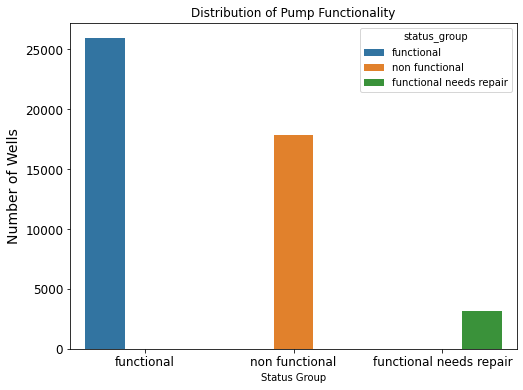

In [104]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", data=train_new)

plt.title('Distribution of Pump Functionality')
plt.xlabel('Status Group')
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()

In [ ]:
#Create an interactive map of homes
#import folium
#from folium.plugins import FastMarkerCluster
#from branca.element import Template, MacroElement

#Create a blank map
#map = folium.Map(location=[tree_train.latitude.mean(), 
                           tree_train.longitude.mean()], zoom_start=6, control_scale=True)

#map

In [ ]:
#Create an interactive map of homes
#import folium
#from folium.plugins import FastMarkerCluster
#from branca.element import Template, MacroElement

#Create a blank map
#map = folium.Map(location=[train_new.latitude.mean(), 
                           train_new.longitude.mean()], zoom_start=6, control_scale=True)

#Index markers for homes Out of Seattle
#for index, location_info in train_new.iterrows():
    folium.Marker([location_info["latitude"], location_info["longitude"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)


#map

In [ ]:
train_new.longitude[train_df.longitude != 34.938093][0]

In [ ]:
train_new.loc[train_new.longitude != 0]['longitude'].value_counts()